## Visualizing of _SKS-SKKS_ pierce point areas in the D" layer
Feel free to modify or play around with the different parameters!

Packages required on your system:
* PyGMT (and corresponding libraries, e.g. pandas, numpy, xarray), still under development (see <https://www.pygmt.org/dev/overview.html>)
* numpy

author: M. Grund (2020-12-25)

In [1]:
import pygmt
import numpy as np
import os

# define parameters for plotting
pygmt.config(COLOR_BACKGROUND = 'white',
             MAP_GRID_PEN_PRIMARY = '0.3p,dimgrey',
             MAP_ANNOT_OFFSET_PRIMARY = '5p',
             MAP_ANNOT_OFFSET_SECONDARY = '5p', 
             MAP_ANNOT_OBLIQUE = '30',
             FONT_ANNOT_PRIMARY = '8p,Helvetica', 
             FONT_LABEL = '8p',
             MAP_FRAME_WIDTH = '2p',
             MAP_FRAME_PEN = '1.2p',
             MAP_FRAME_TYPE = 'plain',
             MAP_TICK_LENGTH_PRIMARY = '12p',
             MAP_LABEL_OFFSET = '5.5p',
             FORMAT_GEO_MAP = 'F')

Create a new pygmt figure object.

In [2]:
fig = pygmt.Figure()
dpifig = 150

Plot geographic content first.

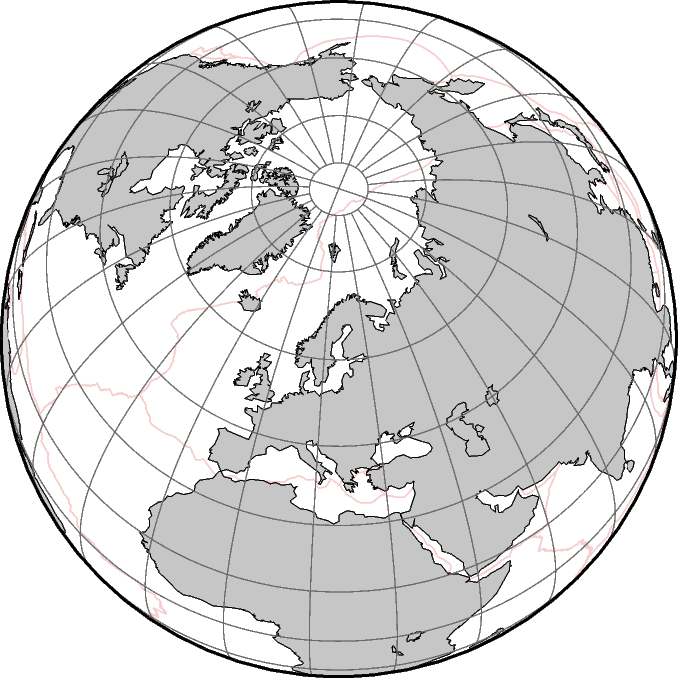

In [3]:
colall = '197.6/197.6/197.6'

# first plot only basics
fig.coast(region = 'g',
          projection = 'G20/63.5/4.5i',
          C = colall)

# now plot plate boundaries after Bird (2003)
plbfile = 'PB2003_boundaries_GMTready.txt'
plbcol = '245.76/204.8/204.8'
fig.plot(data = plbfile, 
         pen = '0.5p,' + plbcol)

# finally add the remaining content atop
fig.coast(frame = '15g15',
          land = colall, 
          resolution = 'c',
          area_thresh = '30000',
          C = colall,
          shorelines = 'black')

fig.show(dpi = dpifig)

Plot raypath from earthquake source locations to station locations in Fennoscandia.

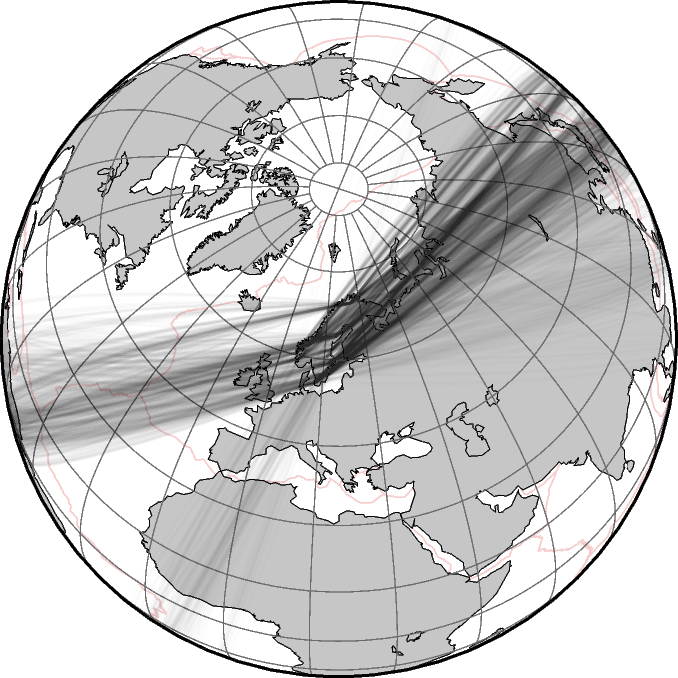

In [4]:
fig.plot(data = '-: SKS_SKKS_paths_Ddprime.geo',
         pen = '1,black@99')

fig.show(dpi = dpifig)

Plot thick circles in red and orange that cover the D" pierce point areas of SKS and SKKS

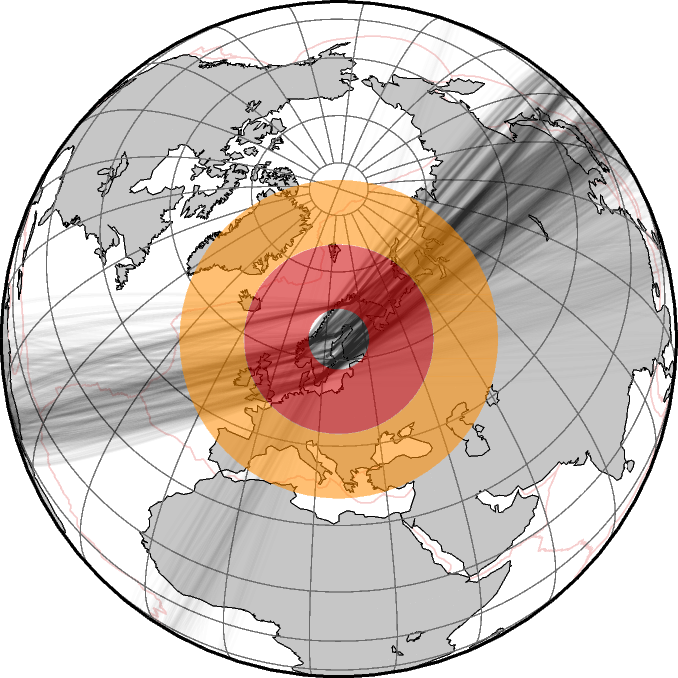

In [5]:
SA_centerN = 63.5
SA_centerE = 20

fig.plot(x = SA_centerE,
         y = SA_centerN,
         style = 'c122p',
         pen = '30.5p,darkorange',
         t = '45')

fig.plot(x = SA_centerE,
         y = SA_centerN,
         style = 'c60p',
         pen = '30.5p,red3',
         t = '45')

fig.show(dpi = dpifig)

Plot thinner black circles to overlay edges of red and orange circles

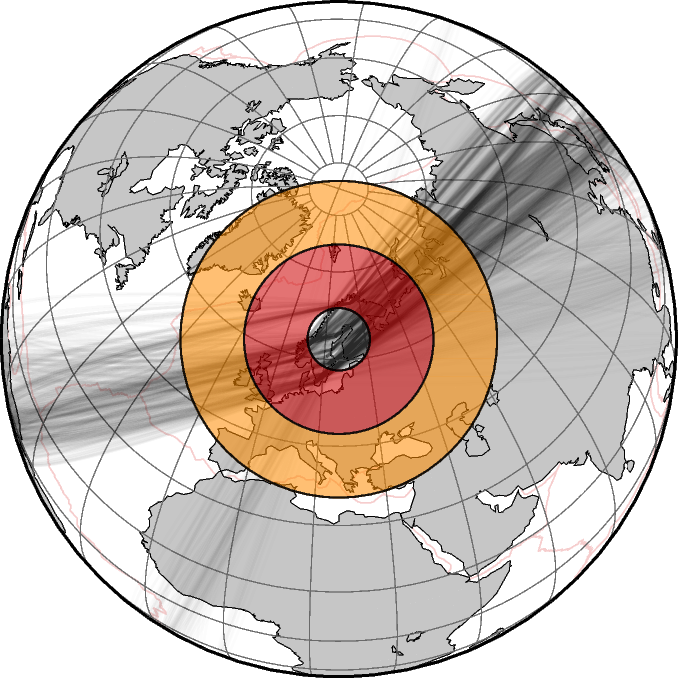

In [6]:
dias = ['152p','91p','30p']

for dia in dias:
    fig.plot(x = SA_centerE,
             y = SA_centerN,
             style = 'c' + dia,
             pen = '0.8p,black',
             t = '10')

fig.show(dpi = dpifig)

Plot area of zoom-in as well as dashed lines connecting the inset to the main map

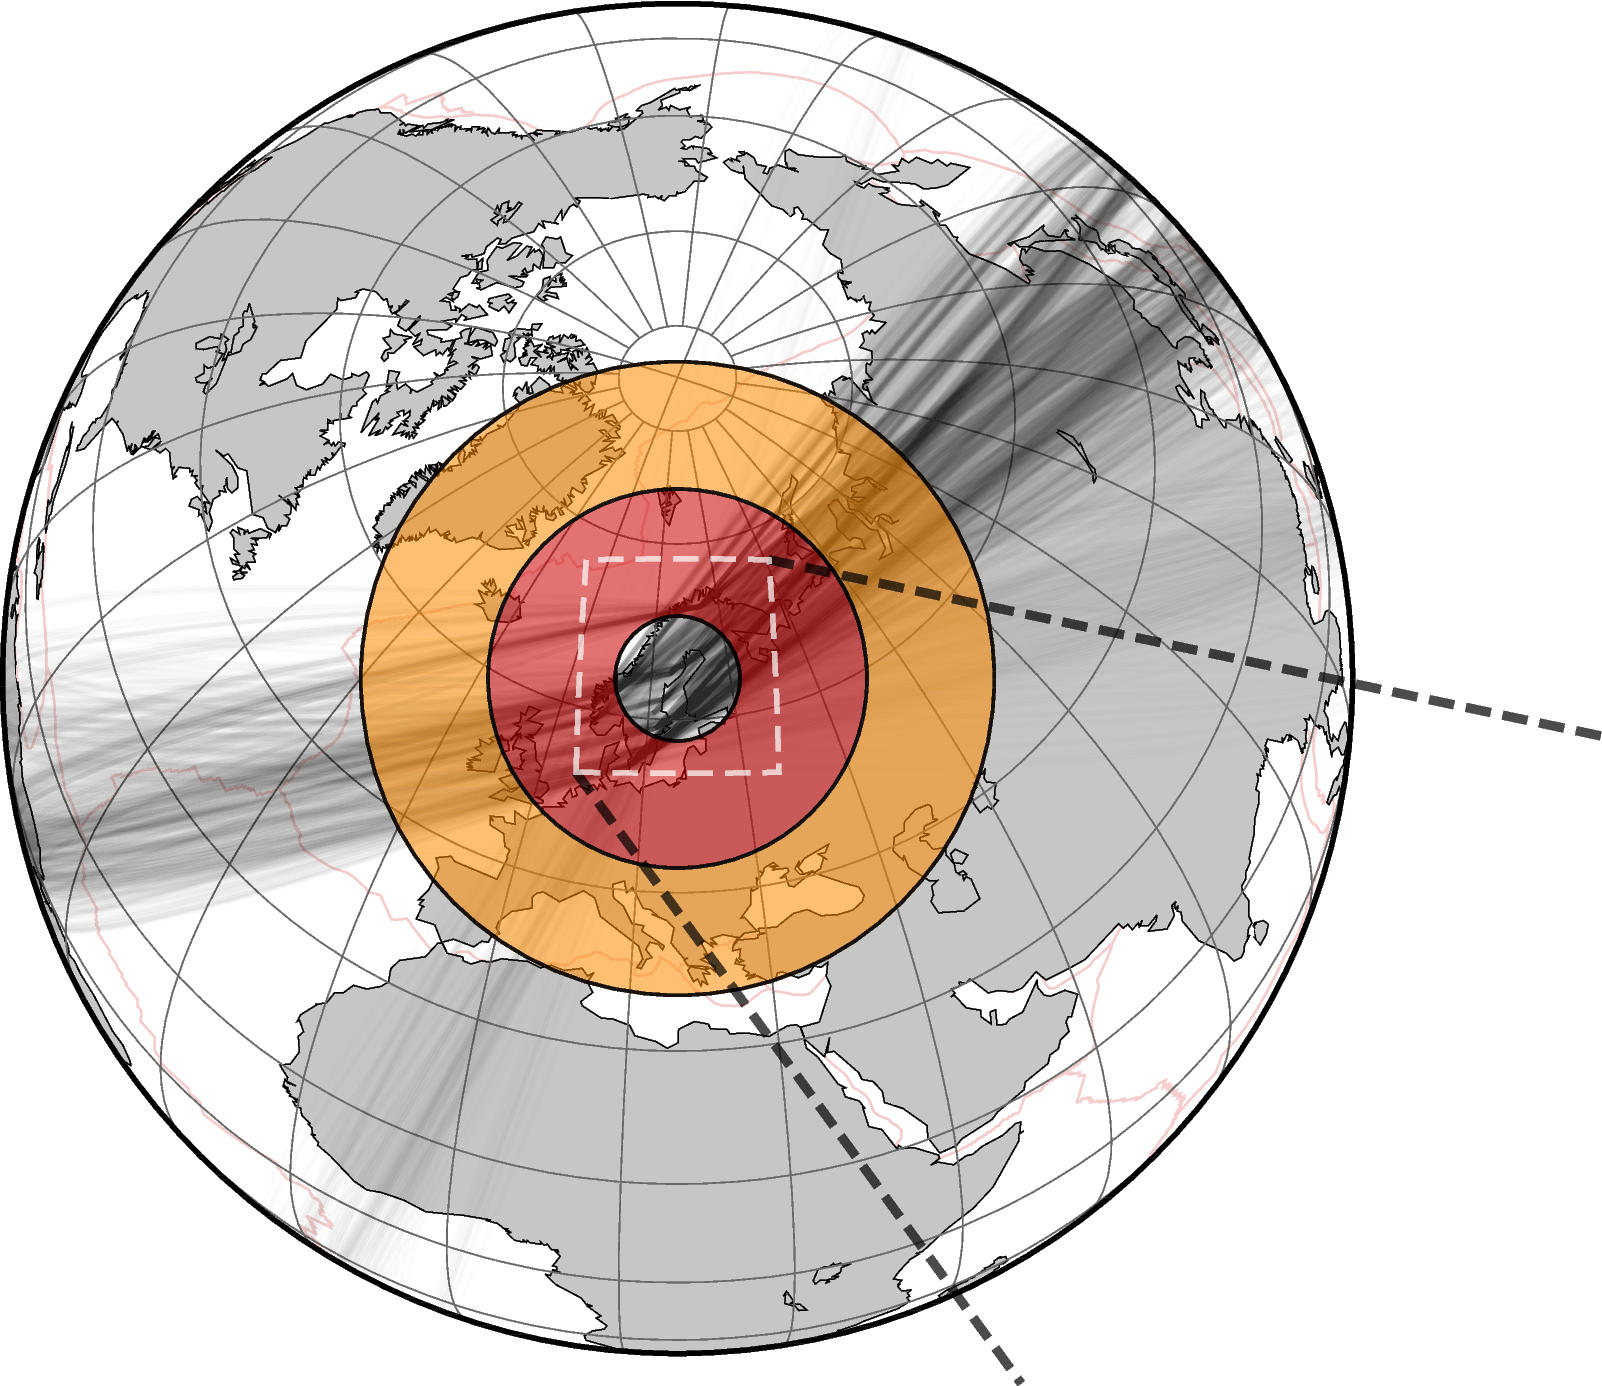

In [7]:
with pygmt.config(MAP_LINE_STEP = '0.75p'):
    
    data = np.array([[5, 54.5, 131.17, 6.4]])
    fig.plot(data = data,
             color = 'black',
             style = 'V0c+e+n5.0c+a0',
             pen = '2.1,black,6_3:0p',
             t = '30',
             N = True)
    
    data = np.array([[46, 72, 125.57, 7.2]])
    fig.plot(data = data,
             color = 'black',
             style = 'V0c+e+n5.0c+a0',
             pen = '2.1,black,6_3:0p',
             t = '30',
             N = True)

    data = np.array([[5, 54.5],
                [-6, 72],
                [46, 72],
                [35, 54.5],
                [5, 54.5]])
    
    fig.plot(data = data,
             pen = '1.2,white,6_3:0p',
             t = '30',
             N = True)
    
fig.show() 

Add annotations, station marker and an exemplary raypath as white line

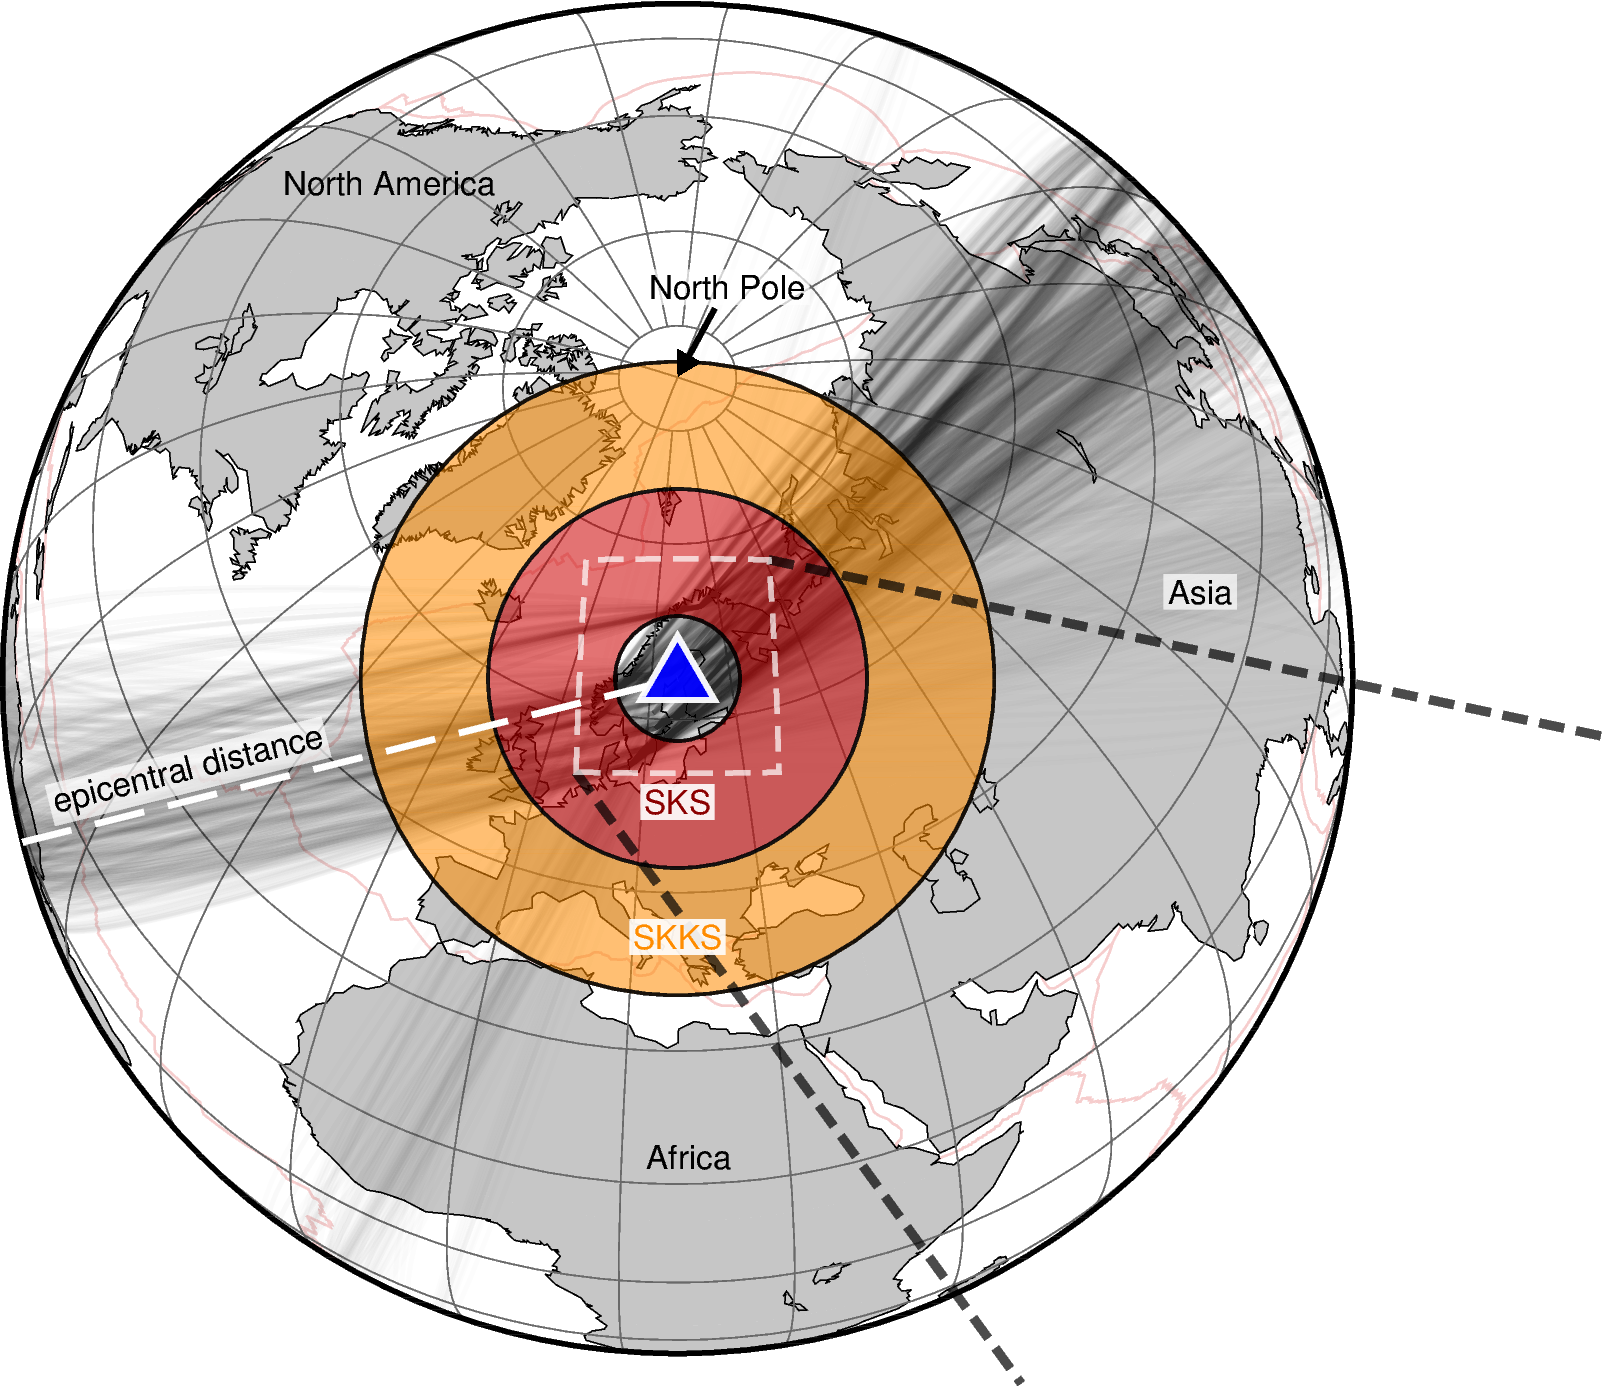

In [8]:
# annotation SKS in red
fig.text(x = SA_centerE, y = 53, text = 'SKS', font = 'f10p,darkred', G = 'white@10')

# annotation SKKS in orange
fig.text(x = SA_centerE, y = 41, text = 'SKKS', font = 'f10p,darkorange', G = 'white@10')

# single raypath
fig.plot(data = '-: SKS_SKKS_paths_Ddprime_single.geo',
         pen = 'thicker,white,--')

# station marker
fig.plot(x = SA_centerE,
         y = SA_centerN,
         style = 't20.5p',
         pen = '1.3p,white',
         G = 'blue',
         t = '5')

# continents etc.
fig.text(x = 21, y = 18.38, text = 'Africa', font = 'f10p', N = True)
fig.text(x = -114.553, y = 53.099, text = 'North America', font = 'f10p', N = True)
fig.text(x = 175, y = 80, text = 'North Pole', font = 'f10p,Helvetica,black', G = 'white@30', N = True)
fig.text(x = 98.255, y = 37.704, text = 'Asia', font = 'f10p,Helvetica,black', G = 'white@30', N = True)

# arrow to north pole
data = np.array([[175, 82.5, -0.7, .65]])
fig.plot(data = data,
         style = 'V0.6c+e+n2.0c+a60',
         color = 'black',
         pen = '4,black',
         N = True)

# epidistance annotation
fig.text(x = -40, y = 33, text = 'epicentral distance', font = 'f+a14+f8p,Helvetica,black', G = 'white@30', N = True)

fig.show()

First shift origin for new map.

In [9]:
fig.shift_origin(xshift = '3.4i', 
                 yshift = '-0.12i')

Plot inset with zoom-in map in lower right corner

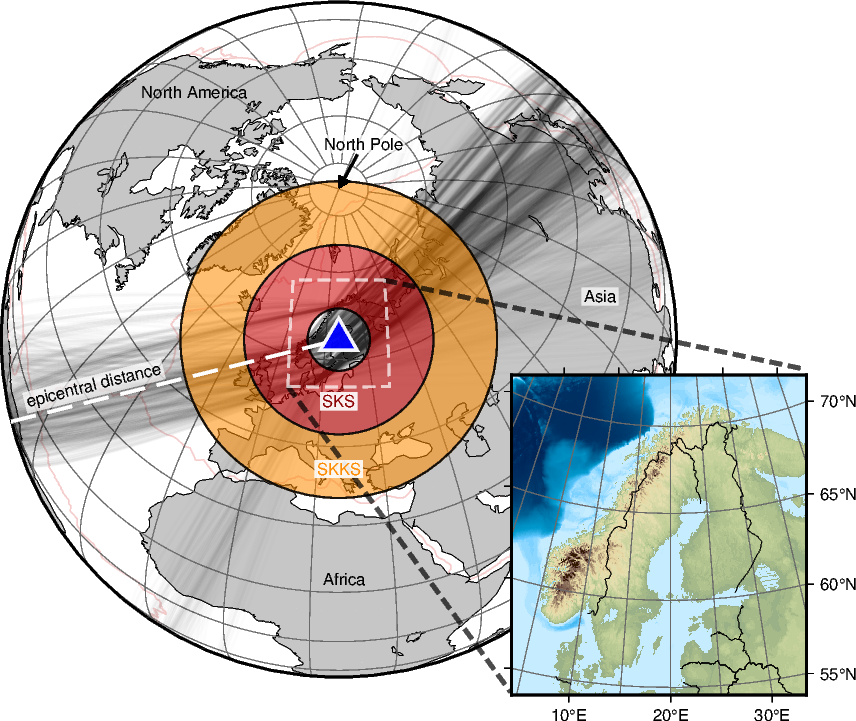

In [10]:
with pygmt.config(MAP_TICK_LENGTH_PRIMARY = '3.5p',
                  MAP_ANNOT_OFFSET_PRIMARY = '3p',
                  MAP_ANNOT_OFFSET_SECONDARY = '3p'):
    
    fig.grdimage('@earth_relief_04m',  
             region = '4.5/53.5/45/71.4r', 
             projection = 'E20/60/5c',
             frame = ['x10g5','y5g5', 'SEnw'],   
             cmap = 'topo_scandi_mod.cpt')
    
fig.coast(resolution = 'h',
          area_thresh = '100',
          borders = '1')   
    
fig.show(dpi = dpifig)

Plot station network and add annotations. Using the `columns` option in `fig.plot(...)` we can assign which columns of the input file *sta_coordinates_all.txt* contain the required **x** and **y** values (note: Python's zero-based indexing is used here; 0, 1, ...). 

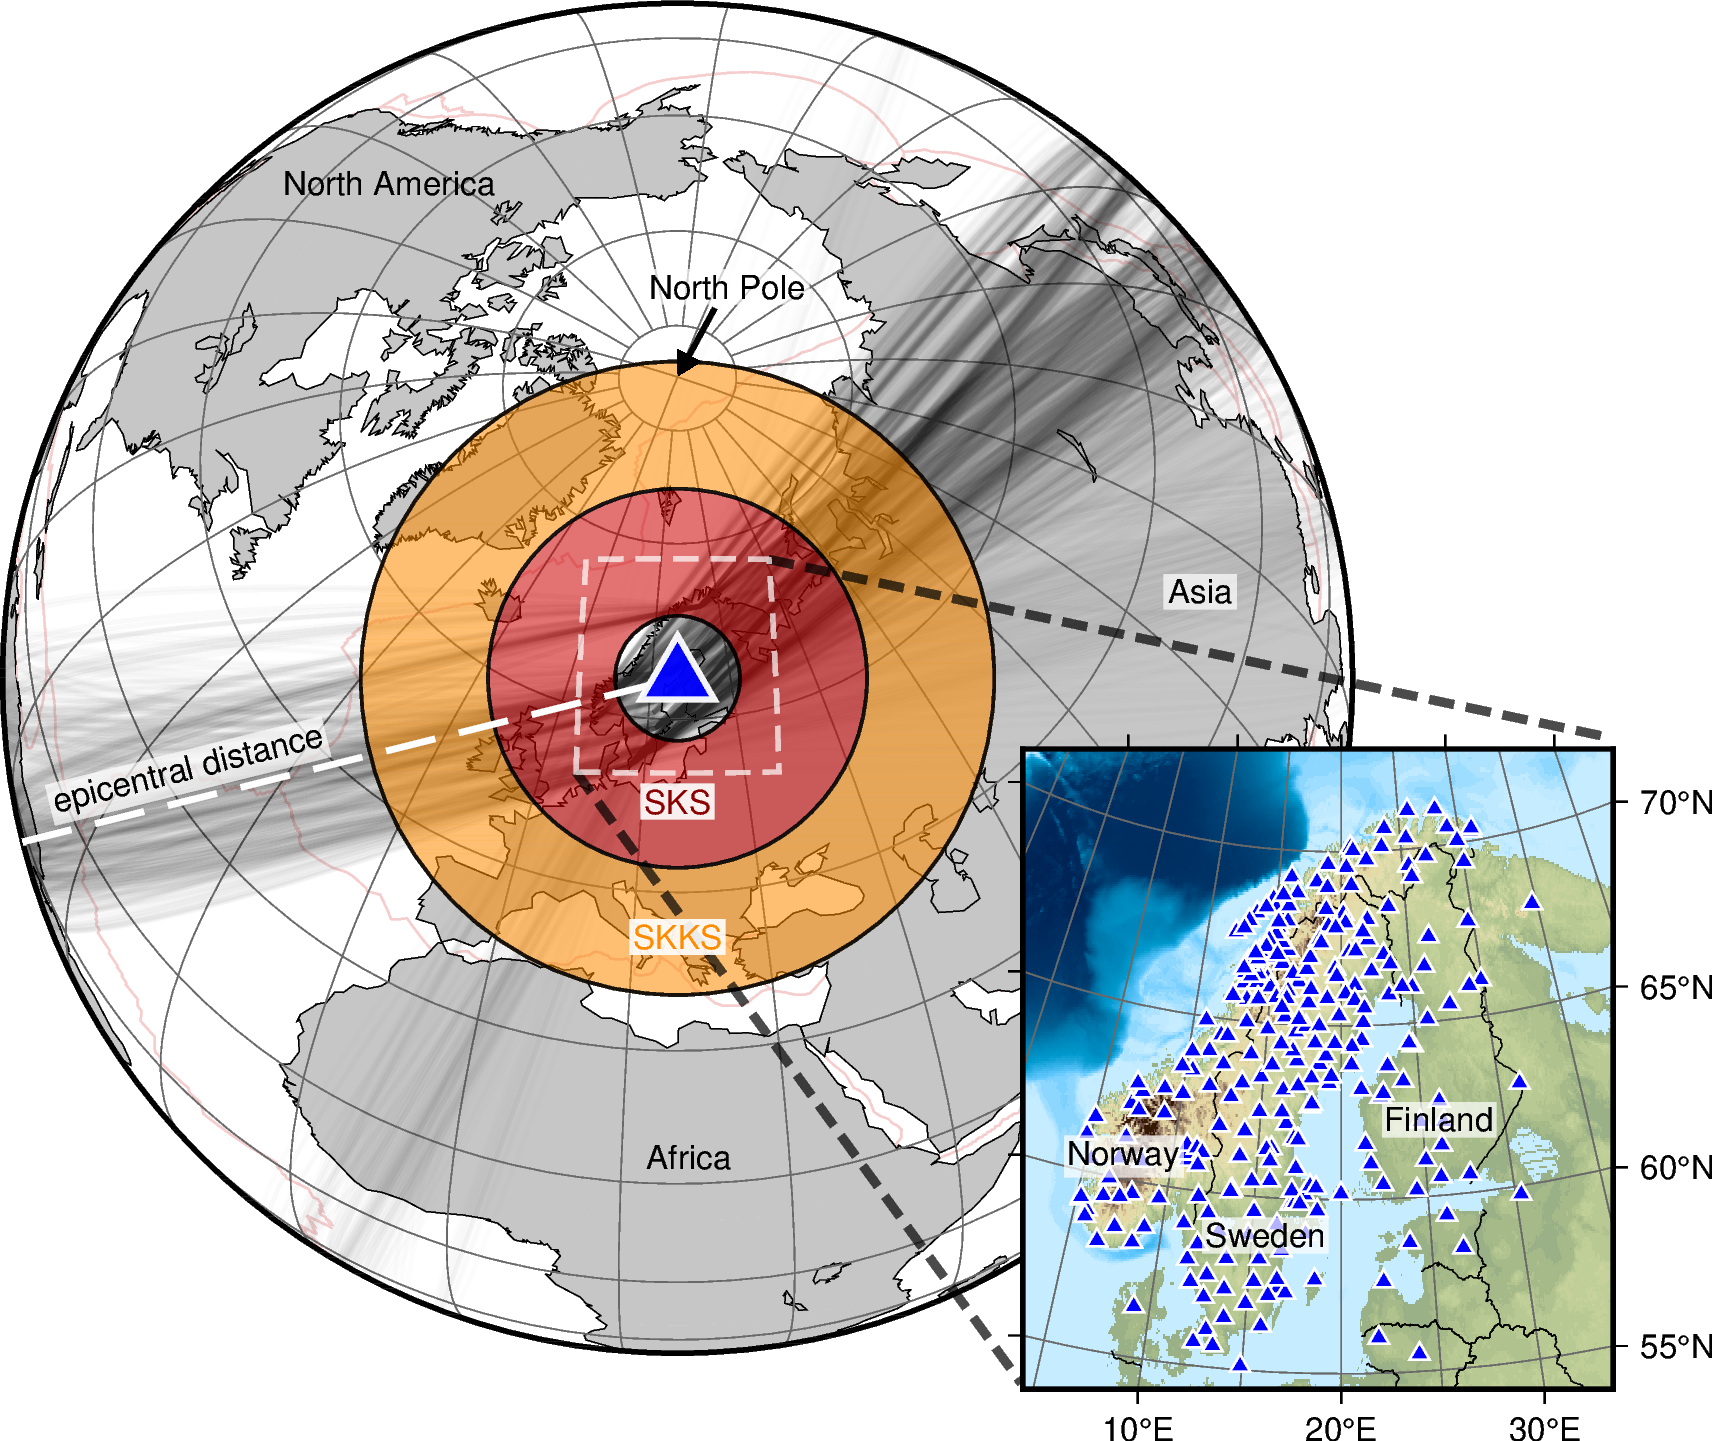

In [11]:
fig.plot(data = "sta_coordinates_all.txt",
         columns = [1, 2],
         style = 't0.2c',
         color = 'blue',
         pen = 'thinner,white')

fig.text(x = 5, y = 61.38, text = 'Norway', font = 'f8p,Helvetica,black', G = 'white@30', D = '0.25/-0.25')
fig.text(x = 14, y = 59.7, text = 'Sweden', font = 'f8p,Helvetica,black', G = 'white@30', D = '0.25/-0.25')
fig.text(x = 24.3, y = 63.1, text = 'Finland', font = 'f8p,Helvetica,black', G = 'white@30', D = '0.25/-0.25')

fig.show()

Finally, save the figure in png format with a resolution of 600 dpi.

In [12]:
fig.savefig('PLOT_sks_skks_areas.png', dpi = 600)